   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
['setosa' 'setosa' 'setosa' 'setosa' 'setosa']
Accuracy: 1.00
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



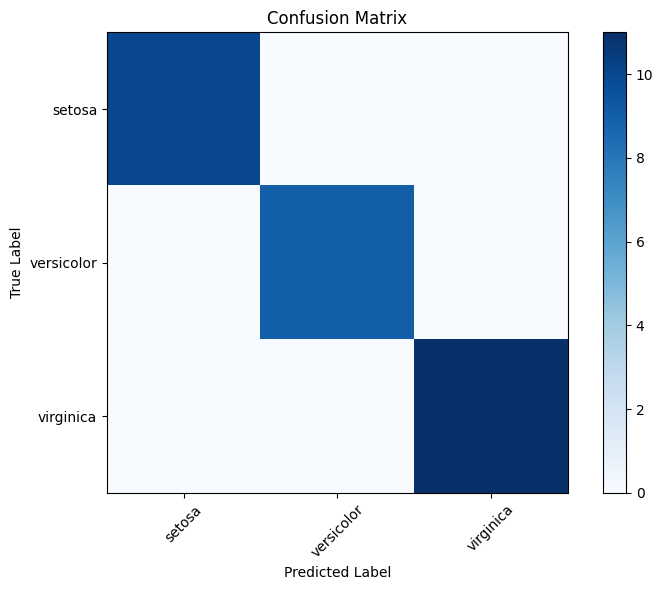

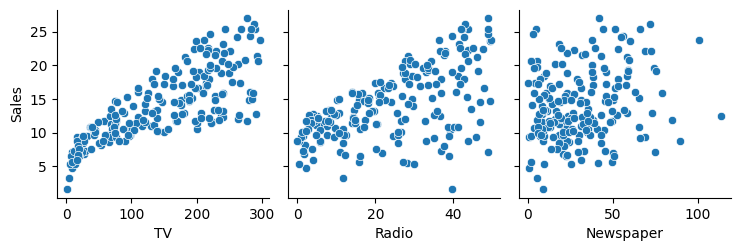

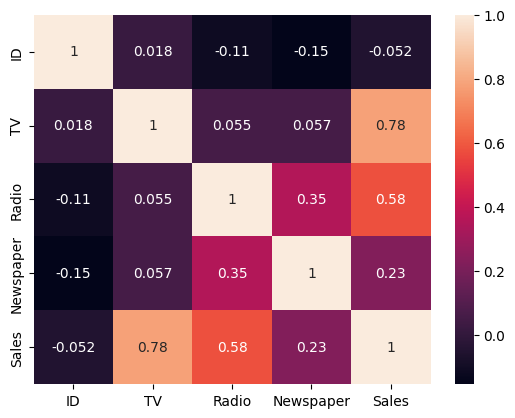

        TV
131  265.2
96   197.6
181  218.5
19   147.3
153  171.3
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[140 rows x 1 columns]
     Sales
131   12.7
96    11.7
181   12.2
19    14.6
153   19.0
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[140 rows x 1 columns]
        TV
18    69.2
170   50.0
107   90.4
98   289.7
177  170.2
182   56.2
5      8.7
146  240.1
12    23.8
152  197.6
61   261.3
125   87.2
180  156.6
154  187.8
80    76.4
7    120.2
33   265.6
130    0.7
37    74.7
74   213.4
183  287.6
145  140.3
45   175.1
159  131.7
60    53.5
123  123.1
179  165.6
185  205.0
122  224.0
44    25.1
16    67.8
55   198.9
150  280.7
111  241.7
22    13.2
189   18.7
129   59.6
4    180.8
83    68.4
106   25.0
134   36.9
66    31.5
26   142.9
113  209.6
168  215.4
63   102.7
8      8.6
75    16.9
118  125.7
143  104.6
71   109.8
124  229.5
184  253.8
97   184.9
149   44.7
24    62.3
30   292.9
160  172.5
40   202.5
56     7.3
     Sales
18    

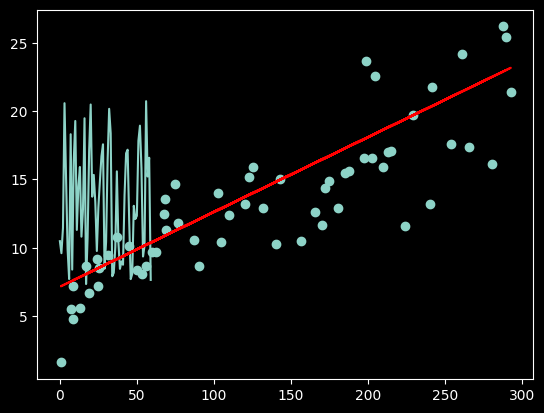

In [4]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

titanic_data = pd.read_csv("/content/Titanic-Dataset.csv")
titanic_data

#Task 2
import pandas as pd
import numpy as np

from scipy import stats

def load_data(filename):
    """Given a filename of a csv load data into a Pandas dataframe.

        filename - string

        return Pandas dataframe
    """
    return pd.read_csv(filename, encoding='utf-8')

def remove_unnecessary_columns(imdb):
    return imdb.drop('budget', axis=1, inplace=True)

def null_val(imdb):
    return imdb.isnull().sum()

def fill_missing_values(imdb):
    mean_value=imdb['gross'].mean()
    return imdb['gross'].fillna(value=mean_value, inplace=True)

def update_country_names(imdb):
    imdb["Country"]= imdb["Country"].str.upper()
    imdb['Country'] = np.where((imdb.Country == 'UNITED STATES'),'USA',imdb.Country)
    return

def fix_director_values(imdb):
    imdb.director_name = imdb.director_name.fillna('', inplace=True)
    return

def fix_unicode_movie_title(imdb):
    imdb["movie_title"] = ftfy.fix_text(imdb["Les Mis√©rables"])

def fix_outliers(imdb):
    Z=np.abs(stats.zscore(imdb['imdb_score']))
    threshold = 3
    # Position of the outlier
    return (np.where(Z > 3) &imdb.drop(imdb[imdb['title_year'] < 2010].index, inplace = true))

def main():
    """Clean up the imdb dataset
    """
    # 3. Rename filename.csv to the data filename.
    imdb = load_data('/content/IMDB-Movie-Data.csv')
    imdb.dtypes
    #Attributes and types are given below for action 2.
    """color                    object
       director_name            object
       duration                  int64
       gross                   float64
       genres                   object
       movie_title              object
       title_year                int64
       language                 object
       country                  object
       budget                  float64
       imdb_score              float64
       actors                   object
       movie_facebook_likes      int64
       dtype: object"""
    # 4. Using Pandas dataframe drop function get rid of unnecessary columns (set
    # inplace=True)
    # **5. How many columns did you remove?** We removed ONE column - budget because it was highly correlative to gross attribute
    remove_unnecersary_columns(imdb)

    # 6. How many missing values are there within each column?**
    # hint: use isnull and the sum function
    null_val(imdb)


    fill_missing_values(imdb)

    # 9. Uppercase all of the country values (hint: str.upper())
    # 9a. replace any reference to United States to USA
    update_country_names(imdb)
    imdb["Country"]= imdb["Country"].str.upper()

    # 10. Replace N/A, Nan, Null with an empty string
    imdb = fix_director_values(imdb)

    # 11. Fix unicode in 'movie_title' column with import ftfy
    imdb = fix_unicode_movie_title(imdb)

    # 12. Assume a movie cannot be < 10 mins or > 300 mins. If a movie is outside those
    # bounds set the value to 0.
    imdb['duration']=imdb['duration'].where(imdb['duration'] <10, 0)

    imdb['duration']=imdb['duration'].where(imdb['duration'] >300, 0)

    # **13. What would be considered an outlier for imdb_score?**
    """We calculated z score
       In z score, any value which is greater than 3 is considered as an outlier.
       Because 99.6% of the data is under z-score 3. Therefore anything greater than z score 3 is an outlier"""
    # 14. Fix imdb_score and title_year (no year prior to 2010) outliers.
    imdb = fix_outliers(imdb)

    # 15. output the cleaned up file onto a new csv called clean_imdb.csv
    imdb.to_csv('clean_imdb.csv',index=False)

#task-3 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Iris dataset
iris = load_iris()

# Create a DataFrame for easier manipulation
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = iris.target  # Target variable (species)

# Map numerical labels to species names for better understanding
target_names = iris.target_names
target_dict = {i: name for i, name in enumerate(target_names)}
y = np.vectorize(target_dict.get)(y)

# Display the first few rows of the dataset
print(X.head())
print(y[:5])  # Print first 5 labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features by scaling (optional for some models, like KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a pipeline with preprocessing and classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report and confusion matrix
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Advertising.csv")
df.head()

df.shape

df.describe()

sns.pairplot(df, x_vars=['TV', 'Radio','Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

df['TV'].plot.hist(bins=10, color="green", xlabel="TV")

df['Radio'].plot.hist(bins=10, color="orange", xlabel="Radio")

df['Newspaper'].plot.hist(bins=10,color="black", xlabel="newspaper")

sns.heatmap(df.corr(),annot = True)
plt.show()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['TV']], df[['Sales']], test_size = 0.3,random_state=0)

print(X_train)

print(y_train)

print(X_test)

print(y_test)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

res= model.predict(X_test)
print(res)

print("Accuracy Score: ", model.score(X_test,y_test)*100)

model.coef_

model.intercept_

0.05473199* 69.2 + 7.14382225

plt.style.use('dark_background')
plt.grid()
plt.plot(res)

plt.style.use('default')
plt.grid()
plt.scatter(X_test, y_test)
plt.plot(X_test, 7.14382225 + 0.05473199 * X_test, 'r')
plt.show()